In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/decision (1).csv')

In [ ]:
df

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [ ]:
x = df.drop(['play','day'],axis = 1)
x
#x will contain rest of the col except day & play.

,outlook,temp,humidity,wind
0,Sunny,Hot,High,Weak
1,Sunny,Hot,High,Strong
2,Overcast,Hot,High,Weak
3,Rain,Mild,High,Weak
4,Rain,Cool,Normal,Weak
5,Rain,Cool,Normal,Strong
6,Overcast,Cool,Normal,Strong
7,Sunny,Mild,High,Weak
8,Sunny,Cool,Normal,Weak
9,Rain,Mild,Normal,Weak


In [ ]:
y = df['play']
y

,play
0,No
1,No
2,Yes
3,Yes
4,Yes
5,No
6,Yes
7,No
8,Yes
9,Yes


In [ ]:
from sklearn import tree

In [ ]:
x = pd.get_dummies(x)

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(x, y)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
feature_col = ['outlook','temp','humidity','wind']


In [ ]:
df_dummy = pd.get_dummies(df[feature_col])
df_dummy

,outlook_Overcast,outlook_Rain,outlook_Sunny,temp_Cool,temp_Hot,temp_Mild,humidity_High,humidity_Normal,wind_Strong,wind_Weak
0,False,False,True,False,True,False,True,False,False,True
1,False,False,True,False,True,False,True,False,True,False
2,True,False,False,False,True,False,True,False,False,True
3,False,True,False,False,False,True,True,False,False,True
4,False,True,False,True,False,False,False,True,False,True
5,False,True,False,True,False,False,False,True,True,False
6,True,False,False,True,False,False,False,True,True,False
7,False,False,True,False,False,True,True,False,False,True
8,False,False,True,True,False,False,False,True,False,True
9,False,True,False,False,False,True,False,True,False,True


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
ele = LabelEncoder()

In [ ]:
df['outlook'] = ele.fit_transform(df['outlook'])
df['temp'] = ele.fit_transform(df['temp'])
df['humidity'] = ele.fit_transform(df['humidity'])
df['wind'] = ele.fit_transform(df['wind'])
df['play'] = ele.fit_transform(df['play'])

In [ ]:
df

,day,outlook,temp,humidity,wind,play
0,D1,2,1,0,1,0
1,D2,2,1,0,0,0
2,D3,0,1,0,1,1
3,D4,1,2,0,1,1
4,D5,1,0,1,1,1
5,D6,1,0,1,0,0
6,D7,0,0,1,0,1
7,D8,2,2,0,1,0
8,D9,2,0,1,1,1
9,D10,1,2,1,1,1


In [ ]:
x = df.drop(columns = ['play','day'])
y = df['play']


In [ ]:
x

,outlook,temp,humidity,wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [ ]:
y

,play
0,0
1,0
2,1
3,1
4,1
5,0
6,1
7,0
8,1
9,1


In [ ]:
model = clf.fit(x, y)

[Text(0.4444444444444444, 0.9, 'x[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.3333333333333333, 0.7, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.38888888888888884, 0.8, 'True  '),
 Text(0.5555555555555556, 0.7, 'x[2] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(0.5, 0.8, '  False'),
 Text(0.3333333333333333, 0.5, 'x[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2222222222222222, 0.3, 'x[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1111111111111111, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7777777777777778, 0.5, 'x[3] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.6666666666666666, 0.3, 'x[1] <= 1.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5555555555555556, 0.1, 'entropy = 0.0\nsamples = 1\nvalu

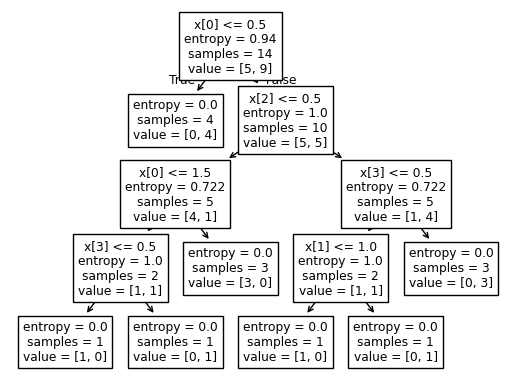

In [ ]:
tree.plot_tree(model)

In [ ]:
pred = model.predict(x)

In [ ]:
pred

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [ ]:
print(y == pred )

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
Name: play, dtype: bool


In [ ]:
x1 = [[1, 2, 0, 0]]
output = model.predict(x1)
print(output)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


X1 = [[1, 2, 0, 0]]
1 - outlook - rain
2 - temp - hot
0 - humidity - high
0 - wind - strong

In [ ]:
import nltk
from nltk.classify import MaxentClassifier

In [ ]:
train_data = [
    ({'Outlook': 0, 'Temperature': 0, 'Humidity': 0, 'Wind': 0}, 0),  # No
    ({'Outlook': 0, 'Temperature': 0, 'Humidity': 0, 'Wind': 1}, 0),  # No
    ({'Outlook': 1, 'Temperature': 0, 'Humidity': 0, 'Wind': 0}, 1),  # Yes
    ({'Outlook': 2, 'Temperature': 1, 'Humidity': 0, 'Wind': 0}, 1),  # Yes
    ({'Outlook': 2, 'Temperature': 2, 'Humidity': 1, 'Wind': 0}, 1),  # Yes
    ({'Outlook': 2, 'Temperature': 2, 'Humidity': 1, 'Wind': 1}, 0),  # No
    ({'Outlook': 1, 'Temperature': 2, 'Humidity': 1, 'Wind': 1}, 1),  # Yes
    ({'Outlook': 0, 'Temperature': 1, 'Humidity': 0, 'Wind': 0}, 0),  # No
]
#  iis= iterative scaling algo used to train the model like maxent = maximum entropy
# goal of iis - to find the weights & parameters
model = MaxentClassifier.train(train_data, algorithm= 'iis',max_iter = 10)
test_data = {'Outlook': 0, 'Temperature': 0, 'Humidity': 1, 'Wind': 0}
prediction = model.classify(test_data)
print(prediction)


  ==> Training (10 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.500
             2          -0.57723        0.750
             3          -0.51313        0.875
             4          -0.46926        0.875
             5          -0.43544        0.875
             6          -0.40779        0.875
             7          -0.38443        0.875
             8          -0.36429        0.875
             9          -0.34666        1.000
         Final          -0.33105        1.000
0
